# **import** libraries

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, color
from matplotlib.image import imread
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import cv2
import cv2 as cv
from sklearn.decomposition import SparseCoder
import numpy.linalg as la


# SVD on gray levle


## k = 10%

Matrix U (shape: (472, 472)):
[[ 0.101  0.028  0.04  ...  0.085  0.069  0.049]
 [ 0.096  0.022  0.03  ... -0.121 -0.094 -0.084]
 [ 0.084  0.019  0.015 ...  0.073  0.011  0.096]
 ...
 [ 0.076  0.03   0.021 ... -0.083  0.042 -0.027]
 [ 0.076  0.031  0.017 ...  0.028  0.026  0.052]
 [ 0.075  0.029  0.014 ...  0.005 -0.051 -0.017]]



Singular values (length: 472):
[[191.257   0.      0.    ...   0.      0.      0.   ]
 [  0.     58.027   0.    ...   0.      0.      0.   ]
 [  0.      0.     41.216 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.004   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.004   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.004]]




Top 10% singular values (diagonal matrix):
[[191.257   0.      0.    ...   0.      0.      0.   ]
 [  0.     58.027   0.    ...   0.      0.      0.   ]
 [  0.      0.     41.216 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ..

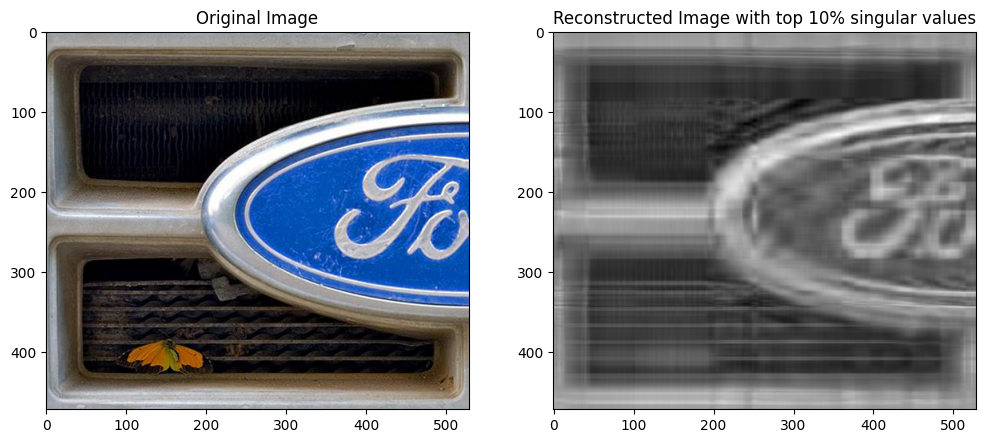

Matrix U (shape: (321, 321)):
[[ 0.054  0.039  0.146 ... -0.035 -0.017 -0.008]
 [ 0.055  0.034  0.161 ...  0.087  0.042  0.012]
 [ 0.055  0.035  0.173 ... -0.113 -0.041 -0.006]
 ...
 [ 0.053  0.05   0.061 ... -0.191 -0.187  0.252]
 [ 0.053  0.044  0.05  ...  0.094 -0.031 -0.056]
 [ 0.052  0.037  0.039 ... -0.006  0.037  0.005]]



Singular values (length: 321):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.018   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.017   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.014]]




Top 10% singular values (diagonal matrix):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ..

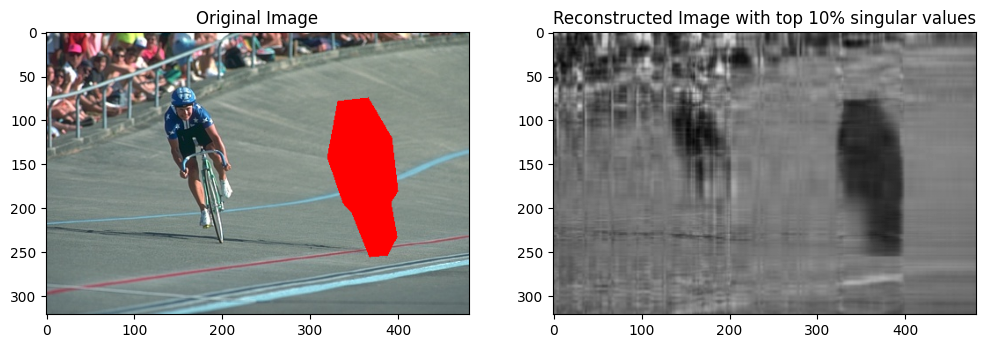

Matrix U (shape: (101, 101)):
[[-0.112 -0.12  -0.106 ... -0.017  0.078  0.068]
 [-0.109 -0.135 -0.11  ...  0.049 -0.085 -0.203]
 [-0.106 -0.149 -0.113 ... -0.106 -0.003  0.269]
 ...
 [-0.106  0.051 -0.29  ... -0.005  0.011  0.074]
 [-0.107  0.047 -0.294 ... -0.048 -0.063 -0.022]
 [-0.107  0.044 -0.293 ...  0.03   0.034  0.003]]



Singular values (length: 101):
[[42.124  0.     0.    ...  0.     0.     0.   ]
 [ 0.     9.474  0.    ...  0.     0.     0.   ]
 [ 0.     0.     6.272 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.002  0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.001  0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.001]]




Top 10% singular values (diagonal matrix):
[[42.124  0.     0.    ...  0.     0.     0.   ]
 [ 0.     9.474  0.    ...  0.     0.     0.   ]
 [ 0.     0.     6.272 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.  

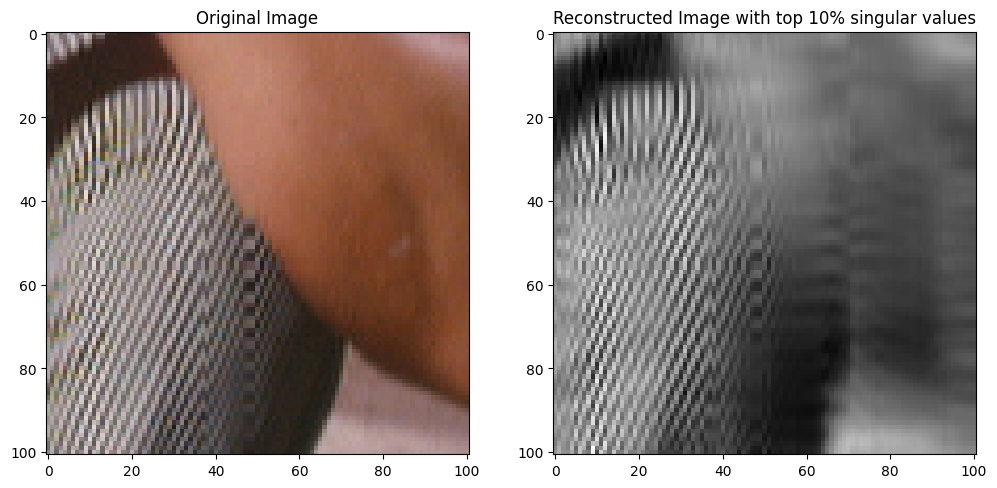

In [ ]:
# Step 1: Read the image
def read_image(image_path):
    image = io.imread(image_path)
    return image

# Step 2: Convert the image to grayscale
# def convert_to_grayscale(image):
#     size_image=len(image)
#     grayscale_image = color.rgb2gray(image)
#     return grayscale_image
def convert_to_grayscale(image):
    if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[2] == 1):
        return image
    else:
        grayscale_image = color.rgb2gray(image)
        return grayscale_image


# Step 3: Perform SVD on the grayscale image
def perform_svd(image):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    return U, S, Vt


# Step 4: Keep top k singular values and reconstruct the image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    k_values = int(total_singular_values * k / 100)
    S_k = np.zeros((total_singular_values, total_singular_values))  # Create a square matrix
    S_k[:k_values, :k_values] = np.diag(S[:k_values])  # Set the top k singular values on the diagonal
    U_k = U[:, :k_values]
    Vt_k = Vt[:k_values, :]
    # Ensure the dimensions are aligned for multiplication
    reconstructed_image = np.dot(U_k, np.dot(S_k, Vt_k))
    return reconstructed_image
# Step 5: Reconstruct image
def reconstruct_image(U, S, Vt, k):
    total_singular_values = len(S)
    reconstructed_S = np.zeros((U.shape[1], Vt.shape[0]))
    reconstructed_S[:k, :k] = np.diag(S[:k])

    reconstructed_image = U.dot(reconstructed_S).dot(Vt)
    return reconstructed_image


# Step 6: Display the original and reconstructed images
def display_images(original_image, reconstructed_image, k):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title('Original Image')
    axs[0].axis('on')
    axs[1].imshow(reconstructed_image, cmap='gray')
    axs[1].set_title(f'Reconstructed Image with top {k}% singular values')
    axs[1].axis('on')
    plt.show()


# Step 7: Print matrices and singular values
def print_matrices(U, S, Vt, k):
    np.set_printoptions(precision=3, suppress=True)
    print("Matrix U (shape: {}):".format(U.shape))
    print(U)

    print("\n\n\nSingular values (length: {}):".format(len(S)))
    print(np.diag(S))  # Print singular values as a diagonal matrix

    k_values = int(len(S) * k / 100)
    S_k = np.zeros_like(S)
    S_k[:k_values] = S[:k_values]
    print(f"\n\n\n\nTop {k}% singular values (diagonal matrix):")
    print(np.diag(S_k))  # Print top k singular values as a diagonal matrix

    print("\nMatrix Vt (shape: {}):".format(Vt.shape))
    print(Vt)


def process_multiple_images(image_paths, k):
    for image_path in image_paths:
        original_image = read_image(image_path)
        if original_image is None:
            print(f"Error: Unable to read the image {image_path}. Please check the path.")
            continue
        grayscale_image = convert_to_grayscale(original_image)
        U, S, Vt = perform_svd(grayscale_image)
        print_matrices(U, S, Vt, k)
        reconstructed_image = reconstruct_image(U, S, Vt, k)
        display_images(original_image, reconstructed_image, k)
# Main function to execute the steps
def main(image_paths, k):
    process_multiple_images(image_paths, k)

# Provide a list of image paths and the value of k
image_paths = ['54.png', '22.png','55.png']  # Replace with your image paths

# image_paths = ['horse.png', 'parrot1.png','bungee.png']  # Replace with your image paths
k = 10  # Percentage of singular values to keep

# Run the main function
main(image_paths, k)




## grayscale_image for k=[10, 20, 30, 40, 50]

## one image



Reconstruction for k=10%:

Matrix U (shape: (321, 321)):
[[ 0.054  0.039  0.146 ... -0.035 -0.017 -0.008]
 [ 0.055  0.034  0.161 ...  0.087  0.042  0.012]
 [ 0.055  0.035  0.173 ... -0.113 -0.041 -0.006]
 ...
 [ 0.053  0.05   0.061 ... -0.191 -0.187  0.252]
 [ 0.053  0.044  0.05  ...  0.094 -0.031 -0.056]
 [ 0.052  0.037  0.039 ... -0.006  0.037  0.005]]



Singular values (length: 321):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.018   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.017   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.014]]




Top 10% singular values (diagonal matrix):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]

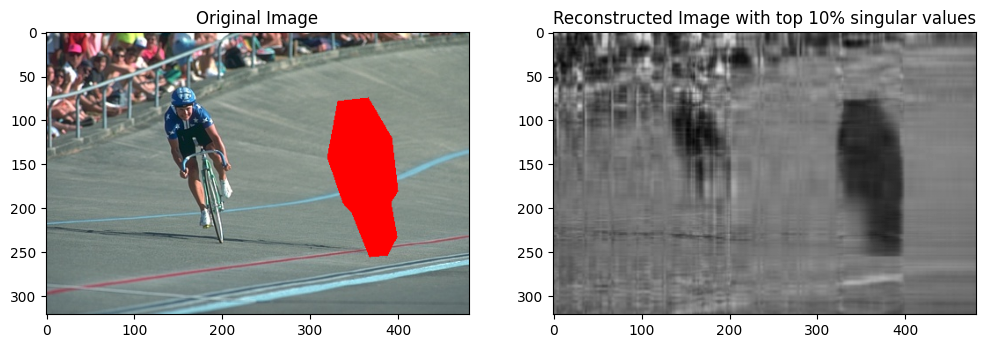



Reconstruction for k=20%:

Matrix U (shape: (321, 321)):
[[ 0.054  0.039  0.146 ... -0.035 -0.017 -0.008]
 [ 0.055  0.034  0.161 ...  0.087  0.042  0.012]
 [ 0.055  0.035  0.173 ... -0.113 -0.041 -0.006]
 ...
 [ 0.053  0.05   0.061 ... -0.191 -0.187  0.252]
 [ 0.053  0.044  0.05  ...  0.094 -0.031 -0.056]
 [ 0.052  0.037  0.039 ... -0.006  0.037  0.005]]



Singular values (length: 321):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.018   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.017   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.014]]




Top 20% singular values (diagonal matrix):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]

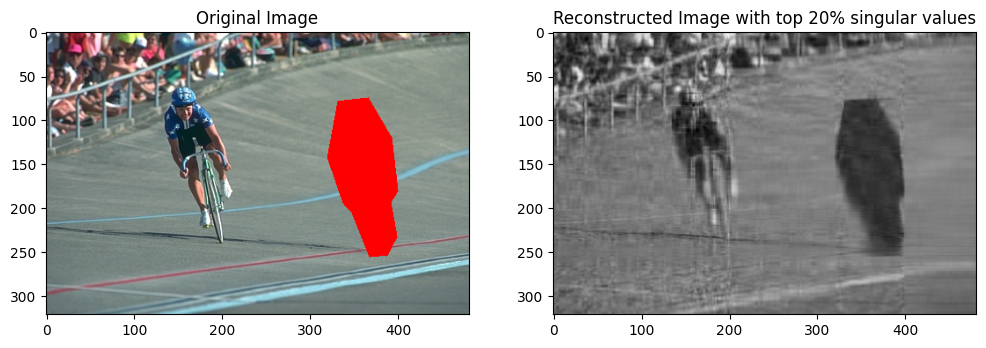



Reconstruction for k=30%:

Matrix U (shape: (321, 321)):
[[ 0.054  0.039  0.146 ... -0.035 -0.017 -0.008]
 [ 0.055  0.034  0.161 ...  0.087  0.042  0.012]
 [ 0.055  0.035  0.173 ... -0.113 -0.041 -0.006]
 ...
 [ 0.053  0.05   0.061 ... -0.191 -0.187  0.252]
 [ 0.053  0.044  0.05  ...  0.094 -0.031 -0.056]
 [ 0.052  0.037  0.039 ... -0.006  0.037  0.005]]



Singular values (length: 321):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.018   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.017   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.014]]




Top 30% singular values (diagonal matrix):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]

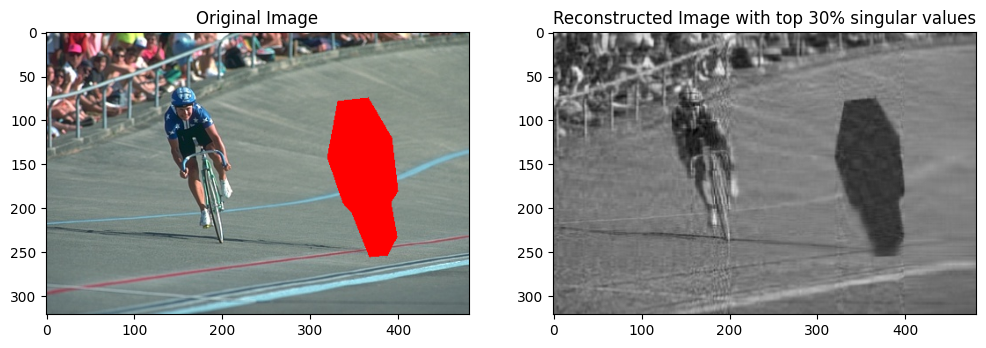



Reconstruction for k=40%:

Matrix U (shape: (321, 321)):
[[ 0.054  0.039  0.146 ... -0.035 -0.017 -0.008]
 [ 0.055  0.034  0.161 ...  0.087  0.042  0.012]
 [ 0.055  0.035  0.173 ... -0.113 -0.041 -0.006]
 ...
 [ 0.053  0.05   0.061 ... -0.191 -0.187  0.252]
 [ 0.053  0.044  0.05  ...  0.094 -0.031 -0.056]
 [ 0.052  0.037  0.039 ... -0.006  0.037  0.005]]



Singular values (length: 321):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.018   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.017   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.014]]




Top 40% singular values (diagonal matrix):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]

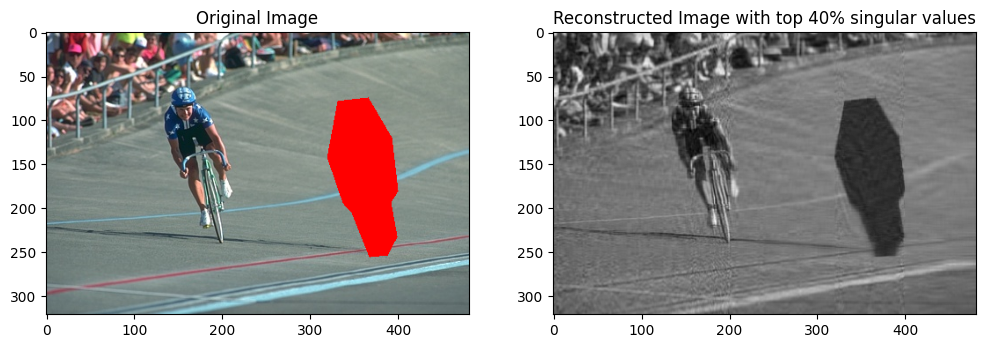



Reconstruction for k=50%:

Matrix U (shape: (321, 321)):
[[ 0.054  0.039  0.146 ... -0.035 -0.017 -0.008]
 [ 0.055  0.034  0.161 ...  0.087  0.042  0.012]
 [ 0.055  0.035  0.173 ... -0.113 -0.041 -0.006]
 ...
 [ 0.053  0.05   0.061 ... -0.191 -0.187  0.252]
 [ 0.053  0.044  0.05  ...  0.094 -0.031 -0.056]
 [ 0.052  0.037  0.039 ... -0.006  0.037  0.005]]



Singular values (length: 321):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.018   0.      0.   ]
 [  0.      0.      0.    ...   0.      0.017   0.   ]
 [  0.      0.      0.    ...   0.      0.      0.014]]




Top 50% singular values (diagonal matrix):
[[197.431   0.      0.    ...   0.      0.      0.   ]
 [  0.     24.648   0.    ...   0.      0.      0.   ]
 [  0.      0.     17.028 ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]

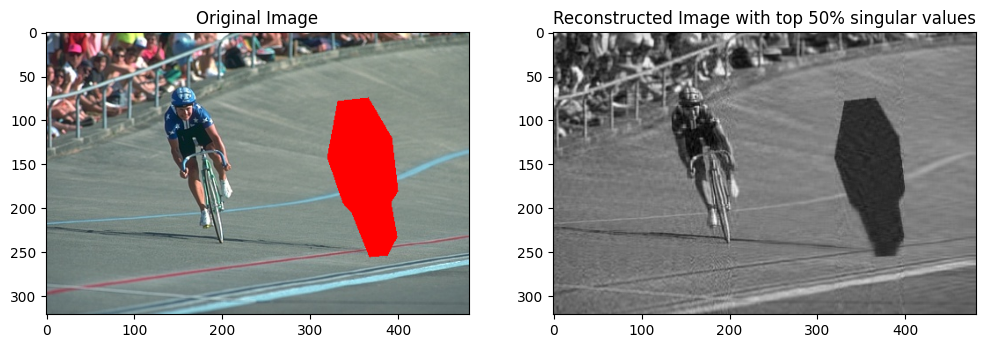

In [ ]:

# Main function to execute the steps
def main(image_path, k_values):
    original_image = read_image(image_path)
    if original_image is None:
        print("Error: Unable to read the image. Please check the path.")
        return
    grayscale_image = convert_to_grayscale(original_image)
    U, S, Vt = perform_svd(grayscale_image)
    for k in k_values:
        print(f"\n\nReconstruction for k={k}%:\n")
        print_matrices(U, S, Vt, k)
        reconstructed_image = reconstruct_image(U, S, Vt, k)
        display_images(original_image, reconstructed_image, k)

# Provide the image path and the list of k values
image_path = '22.png'  # Replace with your image path
k_values = [10, 20, 30, 40, 50]  # Percentage of singular values to keep

# Run the main function
main(image_path, k_values)

## multiple image

In [ ]:
# Main function to execute steps for multiple images
def main(image_paths, k_values):
    for image_path in image_paths:
        original_image = read_image(image_path)
        if original_image is None:
            print(f"Error: Unable to read the image {image_path}. Please check the path.")
            continue
        grayscale_image = convert_to_grayscale(original_image)
        U, S, Vt = perform_svd(grayscale_image)
        for k in k_values:
            reconstructed_image = reconstruct_image(U, S, Vt, k)
            display_images(original_image, reconstructed_image, k)

# Provide a list of image paths and the list of k values
image_paths = ['54.png', '22.png','55.png'] # Replace with your image paths
k_values = [10, 20, 30, 40, 50]  # Percentage of singular values to keep

# Run the main function
main(image_paths, k_values)

In [ ]:


# Function to read an image
def read_image(image_path):
    try:
        return np.array(Image.open(image_path))
    except Exception as e:
        print(f"Error: Unable to read the image {image_path}. Please check the path.")
        return None

# Function to convert an image to grayscale
def convert_to_grayscale(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Function to perform SVD
def perform_svd(image):
    return np.linalg.svd(image, full_matrices=False)

# Function to reconstruct an image with a given number of singular values
def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k] * S[:k], Vt[:k, :])

# Function to display the original image, reconstructed image, and difference image
def display_images(original_image, reconstructed_image, k):
    difference_image = np.abs(original_image - reconstructed_image)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(difference_image, cmap='gray')
    plt.title('Difference Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to execute steps for multiple images
def main(image_paths, k_values):
    for image_path in image_paths:
        original_image = read_image(image_path)
        if original_image is None:
            continue
        grayscale_image = convert_to_grayscale(original_image)
        U, S, Vt = perform_svd(grayscale_image)
        for k in k_values:
            reconstructed_image = reconstruct_image(U, S, Vt, k)
            display_images(grayscale_image, reconstructed_image, k)

# Provide a list of image paths and the list of k values
image_paths = ['54.png', '22.png','55.png']  # Replace with your image paths
k_values = [10, 20, 30, 40, 50]  # Percentage of singular values to keep

# Run the main function
main(image_paths, k_values)

# New

In [ ]:
# Step 1: Read the image
def read_image(image_path):
    try:
        return np.array(Image.open(image_path))
    except Exception as e:
        print(f"Error: Unable to read the image {image_path}. Please check the path.")
        return None

# Step 2: Convert to grayscale
def convert_to_grayscale(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Step 3: Perform SVD
def perform_svd(image):
    return la.svd(image, full_matrices=False)

# Step 4: Reconstruct image
def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k] * S[:k], Vt[:k, :])

# Step 5: Display images
def display_images(original_image, reconstructed_image, k):
    difference_image = np.abs(original_image - reconstructed_image)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(difference_image, cmap='gray')
    plt.title('Difference Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Step 6: Crop target area
def crop_target_area(image, x, y, width, height):
    return image[y:y+height, x:x+width]

# Criminisi method for finding similar patches from reconstructed images
def find_similar_patches(image, patch, num_patches=15, patch_size=10, overlap=5):
    patch_height, patch_width = patch.shape
    image_height, image_width = image.shape
    similar_patches = []

    for y in range(0, image_height - patch_height + 1, patch_size - overlap):
        for x in range(0, image_width - patch_width + 1, patch_size - overlap):
            candidate_patch = image[y:y + patch_height, x:x + patch_width]
            if candidate_patch.shape == patch.shape:
                similarity = np.sum((patch - candidate_patch) ** 2)
                similar_patches.append((similarity, candidate_patch))

    similar_patches.sort(key=lambda x: x[0])
    return [patch[1] for patch in similar_patches[:num_patches]]

# Step 7: Visualize and print similar patches
def visualize_patches(patches):
    num_patches = len(patches)
    fig, axs = plt.subplots(1, num_patches, figsize=(15, 5))
    for i in range(num_patches):
        axs[i].imshow(patches[i], cmap='gray')
        axs[i].axis('off')
        print(f"Patch {i + 1}:\n{patches[i]}\n")
    plt.show()

# Main function to execute steps for multiple images
def main(image_paths, k_values, target_coords):
    for image_path in image_paths:
        original_image = read_image(image_path)
        if original_image is None:
            continue
        grayscale_image = convert_to_grayscale(original_image)
        U, S, Vt = perform_svd(grayscale_image)

        for k in k_values:
            reconstructed_image = reconstruct_image(U, S, Vt, k)
            display_images(grayscale_image, reconstructed_image, k)

            x, y, width, height = target_coords
            goal_patch = crop_target_area(grayscale_image, x, y, width, height)
            plt.imshow(goal_patch, cmap='gray')
            plt.title('Goal Patch')
            plt.axis('off')
            plt.show()

            similar_patches = find_similar_patches(reconstructed_image, goal_patch)
            visualize_patches(similar_patches)

# Provide a list of image paths, the list of k values, and target coordinates
image_paths = ['54.png', '22.png','55.png']  # Replace with your image paths
k_values = [10, 20, 30, 40, 50]  # Number of singular values to keep
target_coords = (50, 50, 100, 100)  # Example coordinates for the target area (x, y, width, height)

# Run the main function
main(image_paths, k_values, target_coords)


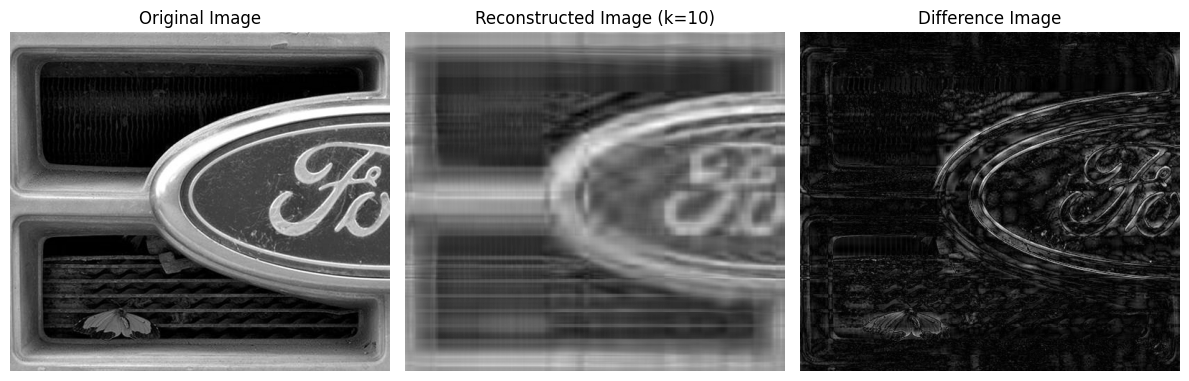

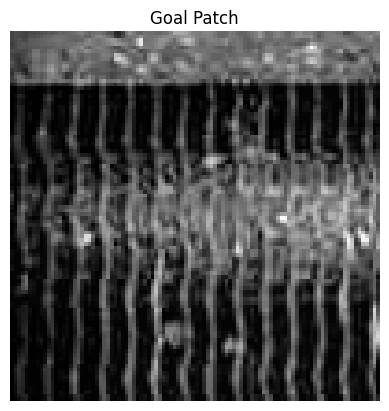

Patch 1:
[[13.285 14.026 14.745 ... 39.309 36.307 35.653]
 [14.406 15.148 15.82  ... 40.37  37.365 36.881]
 [15.087 15.788 16.445 ... 40.905 37.939 37.473]
 ...
 [10.263 11.159 12.047 ...  8.733 14.066  5.943]
 [ 9.309 10.054 10.612 ...  6.202 12.17   5.139]
 [ 7.792  8.422  8.846 ...  5.277 11.914  5.802]]

Patch 2:
[[19.141 20.973 22.666 ... 36.363 34.072 32.808]
 [19.864 21.817 23.421 ... 37.308 34.746 33.655]
 [20.569 22.487 24.092 ... 37.838 35.303 34.256]
 ...
 [ 6.797 13.255 18.824 ... 14.233 15.152 15.084]
 [ 5.12  10.578 15.631 ... 10.667 12.195 13.145]
 [ 3.441  7.936 12.572 ...  8.664 10.707 12.35 ]]

Patch 3:
[[15.083 15.831 16.347 ... 38.173 36.632 35.428]
 [16.081 16.717 17.059 ... 37.489 35.703 34.798]
 [14.224 14.924 15.451 ... 36.671 34.342 33.621]
 ...
 [-5.034 -3.871 -0.944 ... 19.163 23.249 10.818]
 [ 0.124  1.213  3.821 ... 18.324 22.715 10.759]
 [ 4.651  5.698  7.946 ... 16.108 20.591  9.206]]

Patch 4:
[[14.379 15.045 15.554 ... 41.07  37.848 37.551]
 [14.773 15.

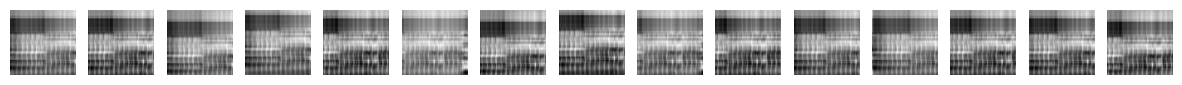

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from skimage import color, io
import numpy.linalg as la

# Step 1: Read the image
def read_image(image_path):
    try:
        return np.array(Image.open(image_path))
    except Exception as e:
        print(f"Error: Unable to read the image {image_path}. Please check the path.")
        return None

# Step 2: Convert to grayscale
def convert_to_grayscale(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

# Step 3: Perform SVD
def perform_svd(image):
    return la.svd(image, full_matrices=False)

# Step 4: Reconstruct image
def reconstruct_image(U, S, Vt, k):
    return np.dot(U[:, :k] * S[:k], Vt[:k, :])

# Step 5: Display images
def display_images(original_image, reconstructed_image, k):
    difference_image = np.abs(original_image - reconstructed_image)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(difference_image, cmap='gray')
    plt.title('Difference Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Step 6: Crop target area
def crop_target_area(image, x, y, width, height):
    return image[y:y+height, x:x+width]

# Criminisi method for finding similar patches from reconstructed images
def find_similar_patches(image, patch, num_patches=15, patch_size=10, overlap=5):
    patch_height, patch_width = patch.shape
    image_height, image_width = image.shape
    similar_patches = []

    for y in range(0, image_height - patch_height + 1, patch_size - overlap):
        for x in range(0, image_width - patch_width + 1, patch_size - overlap):
            candidate_patch = image[y:y + patch_height, x:x + patch_width]
            if candidate_patch.shape == patch.shape:
                similarity = np.sum((patch - candidate_patch) ** 2)
                similar_patches.append((similarity, candidate_patch))

    similar_patches.sort(key=lambda x: x[0])
    return [patch[1] for patch in similar_patches[:num_patches]]

# Step 7: Visualize and print similar patches
def visualize_patches(patches):
    num_patches = len(patches)
    fig, axs = plt.subplots(1, num_patches, figsize=(15, 5))
    for i in range(num_patches):
        axs[i].imshow(patches[i], cmap='gray')
        axs[i].axis('off')
        print(f"Patch {i + 1}:\n{patches[i]}\n")
    plt.show()

# Step 8: Place similar patches in a tensor and visualize in 3D
def visualize_tensor_in_3d(tensor):
    z_slices, patch_height, patch_width = tensor.shape
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for z in range(z_slices):
        for y in range(patch_height):
            for x in range(patch_width):
                ax.scatter(x, y, z, color='gray' if tensor[z, y, x] > 0.5 else 'black', alpha=0.8)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Visualization of Patches Tensor')
    plt.show()

    print(f"Tensor shape: {tensor.shape}")
    print(tensor)

# Main function to execute steps for multiple images
def main(image_paths, k_values, target_coords):
    for image_path in image_paths:
        original_image = read_image(image_path)
        if original_image is None:
            continue
        grayscale_image = convert_to_grayscale(original_image)
        U, S, Vt = perform_svd(grayscale_image)

        for k in k_values:
            reconstructed_image = reconstruct_image(U, S, Vt, k)
            display_images(grayscale_image, reconstructed_image, k)

            x, y, width, height = target_coords
            goal_patch = crop_target_area(grayscale_image, x, y, width, height)
            plt.imshow(goal_patch, cmap='gray')
            plt.title('Goal Patch')
            plt.axis('off')
            plt.show()

            similar_patches = find_similar_patches(reconstructed_image, goal_patch)
            visualize_patches(similar_patches)

            # Create a tensor from the similar patches
            tensor = np.array(similar_patches)
            visualize_tensor_in_3d(tensor)

# Provide a list of image paths, the list of k values, and target coordinates
image_paths = ['54.png']  # Replace with your image paths
k_values = [10, 50]  # Number of singular values to keep
target_coords = (50, 50, 100, 100)  # Example coordinates for the target area (x, y, width, height)

# Run the main function
main(image_paths, k_values, target_coords)


Step 8: Place Similar Patches in a Tensor and Visualize in 3D:
<br>
visualize_tensor_in_3d function creates a 3D scatter plot of the tensor.
Each point in the 3D space represents a pixel value in the patch.
The tensor is printed to the console.